In [1]:
import os
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]="-1"

from KAGGLE_NLP_with_disaster_tweets.data_preparation.utils import DataPipeline

In [2]:
train_file_name = 'train.csv'
test_file_name = 'test.csv'
sample_submission_file_name = 'sample_submission.csv'

In [3]:
data_pipeline = DataPipeline(train_file_name, test_file_name, sample_submission_file_name)
data_pipeline.prepare_datasets()
dataframe = data_pipeline.dataframe

2022-01-27 00:28:05.798669: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-27 00:28:05.798761: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: sersery-asusVivo
2022-01-27 00:28:05.798783: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: sersery-asusVivo
2022-01-27 00:28:05.798997: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 495.29.5
2022-01-27 00:28:05.799070: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 495.29.5
2022-01-27 00:28:05.799088: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 495.29.5
2022-01-27 00:28:05.799716: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU 

Getting the file: ../data/train.csv
-----------------------------------------------------------------------------------------
Dataset 
Size: 7613
Dataset examples:
Input: [  58   77 1933    1    1    1  803   58  151   77    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Target: [0. 1.]
Input: [ 250  763  527    8 3186    2  250    5   13 1964    1  751    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    

<AxesSubplot:ylabel='Frequency'>

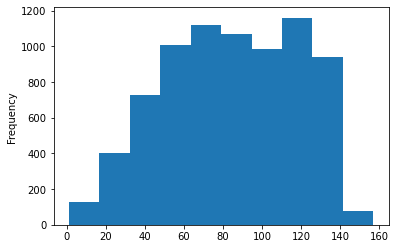

In [4]:
tweet_lengths = dataframe["text"].map(lambda tweet: len(tweet))
tweet_lengths.plot(kind='hist')

<AxesSubplot:>

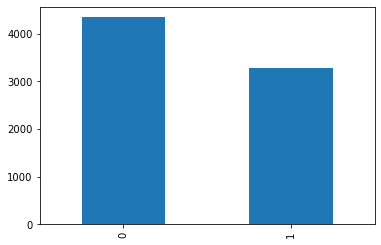

In [5]:
dataframe["target"].value_counts().plot(kind='bar')

### It can be easily seen that the classes are not distributed evenly.

## Check the keyword frequency in the dataset

In [10]:
keywords = dataframe['keyword'].unique().tolist()
keyword_counts = {}

for keyword in keywords:
    keyword_counts[keyword] = dataframe['keyword'].where(dataframe['keyword'] == keyword).count()
print(keyword_counts)

{'': 61, 'ablaze': 36, 'accident': 35, 'aftershock': 34, 'airplane accident': 35, 'ambulance': 38, 'annihilated': 34, 'annihilation': 29, 'apocalypse': 32, 'armageddon': 42, 'army': 34, 'arson': 32, 'arsonist': 34, 'attack': 36, 'attacked': 35, 'avalanche': 30, 'battle': 26, 'bioterror': 37, 'bioterrorism': 30, 'blaze': 38, 'blazing': 34, 'bleeding': 35, 'blew up': 33, 'blight': 32, 'blizzard': 37, 'blood': 35, 'bloody': 35, 'blown up': 33, 'body bag': 33, 'body bagging': 33, 'body bags': 41, 'bomb': 34, 'bombed': 38, 'bombing': 29, 'bridge collapse': 35, 'buildings burning': 35, 'buildings on fire': 33, 'burned': 33, 'burning': 34, 'burning buildings': 37, 'bush fires': 25, 'casualties': 35, 'casualty': 34, 'catastrophe': 36, 'catastrophic': 30, 'chemical emergency': 33, 'cliff fall': 36, 'collapse': 34, 'collapsed': 35, 'collide': 34, 'collided': 40, 'collision': 39, 'crash': 33, 'crashed': 34, 'crush': 37, 'crushed': 31, 'curfew': 37, 'cyclone': 32, 'damage': 41, 'danger': 36, 'dead

<AxesSubplot:>

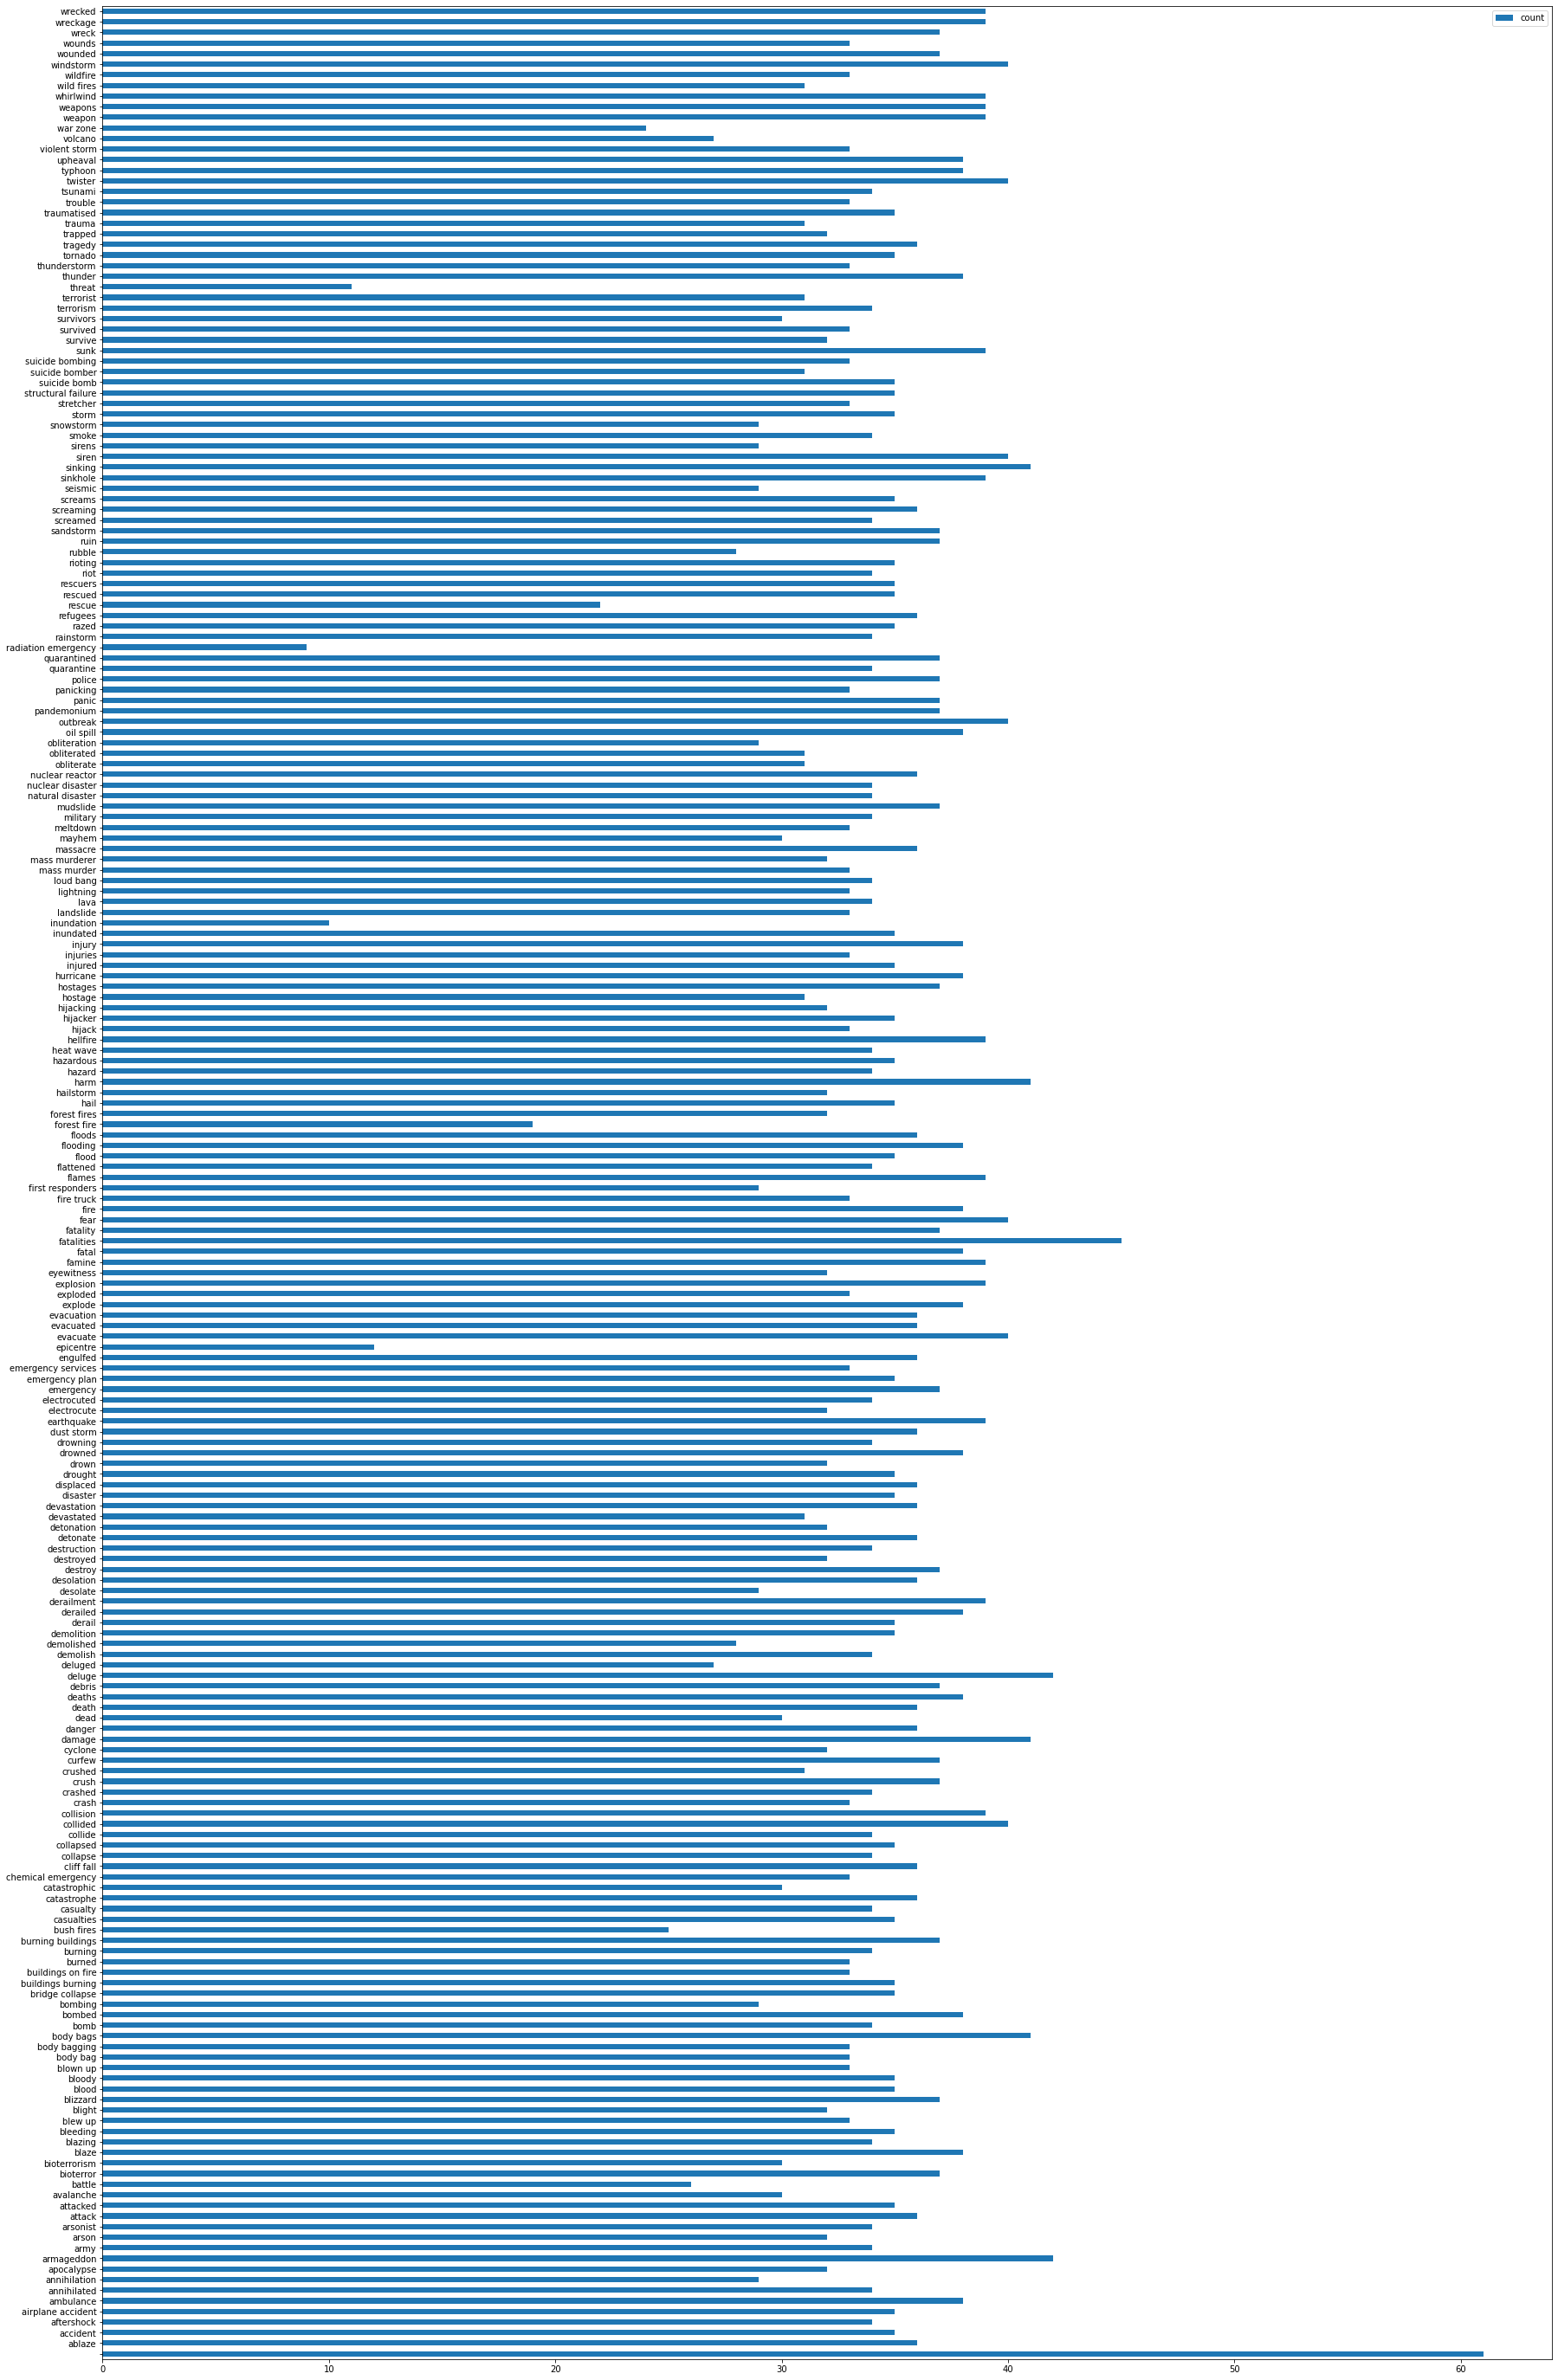

In [32]:
keyword_count_df = pd.DataFrame({"keyword": keyword_counts.keys(), "count": keyword_counts.values()}, index=keyword_counts.keys())
keyword_count_df.plot.barh(figsize=(30, 50))
# keyword_count_df